In [1]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/00


In [57]:
mstop_175   = pd.read_pickle('../../SUSY_DNN/Control_Plots/DNN_ips/SUSY_Mstop_175_mchi_7_5.pkl')

tt_df     = pd.read_pickle('../../SUSY_DNN/Control_Plots/DNN_ips/ttbar.pkl')
st_df     = pd.read_pickle('../../SUSY_DNN/Control_Plots/DNN_ips/Single_top.pkl')
vv_df     = pd.read_pickle('../../SUSY_DNN/Control_Plots/DNN_ips/VV.pkl')

In [58]:
selected_columns = ['lepton_eta', 'sublepton_eta','llbar_deta']

In [59]:
sig_df = mstop_175[selected_columns]
tt_df  = tt_df[selected_columns]

In [60]:
sig_df = sig_df.sample(frac=1)
tt_df  = tt_df.sample(frac=1)

sig_df_train = sig_df[1:10000]
tt_df_train  = tt_df[1:10000]

# Standardize
sig_mean = sig_df_train.mean()
sig_std  = sig_df_train.std()

tt_mean = tt_df_train.mean()
tt_std  = tt_df_train.std()

sig_df_train = (sig_df_train - sig_mean)/ sig_std
tt_df_train  = (tt_df_train  - tt_mean)/ tt_std

In [61]:
sig_df_test = sig_df[10000:20000]
tt_df_test  = tt_df[10000:20000]

# Standardize
#sig_mean = sig_df_test.mean()
#sig_std  = sig_df_test.std()

#tt_mean = tt_df_test.mean()
#tt_std  = tt_df_test.std()

sig_df_test = (sig_df_test - sig_mean)/ sig_std
tt_df_test  = (tt_df_test  - tt_mean)/ tt_std

In [62]:
bkgList = [tt_df_train]  # List of your dataframes

bkg_df_train = pd.concat(bkgList)

signal    = sig_df_train.values
bkg       = bkg_df_train.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))

In [63]:
test_signal    = sig_df_test.values
test_bkg       = tt_df_test.values

test_sig_label = np.ones(len(test_signal))
test_bkg_label = np.zeros(len(test_bkg))

test_data      = np.concatenate((test_signal,test_bkg))
test_label     = np.concatenate((test_sig_label,test_bkg_label))

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
sig_df.loc[:,'target'] = "SUSY"
tt_df.loc[:,'target']  = "ttbar"

/home/amandeephy/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/amandeephy/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [97]:
tt_df

,lepton_eta,sublepton_eta,llbar_deta,target
0,-0.165681,0.085386,0.251068,ttbar
1,0.798967,-0.105793,0.904760,ttbar
2,0.130620,-0.433511,0.564131,ttbar
3,1.092385,-1.381781,2.474166,ttbar
4,-1.328926,1.569256,2.898182,ttbar
...,...,...,...,...
1507872,0.705557,-0.892421,1.597978,ttbar
1507873,-1.842577,0.418093,2.260670,ttbar
1507874,2.329492,1.662360,0.667132,ttbar
1507875,-1.345814,0.527760,1.873574,ttbar


In [107]:
x_all = [sig_df[:1000], tt_df[:1000]]
x_all = pd.concat(x_all)

In [108]:
# Separating out the features
x = x_all.loc[:, selected_columns].values

# Separating out the target
y = x_all.loc[:,['target']].values

In [109]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [110]:
x.shape

(2000, 3)

In [111]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2'])

In [112]:
principalDf

,pc 1,pc 2
0,-0.879807,1.039178
1,0.762543,-0.915503
2,-0.565997,-0.930626
3,-1.533155,0.703671
4,-0.056771,0.372851
...,...,...
1995,0.057797,1.057252
1996,-2.194575,0.547716
1997,1.842262,-0.124869
1998,0.254637,-1.281214


In [113]:
x_all   = x_all.reset_index()
finalDf = pd.concat([principalDf, x_all[['target']]], axis = 1)

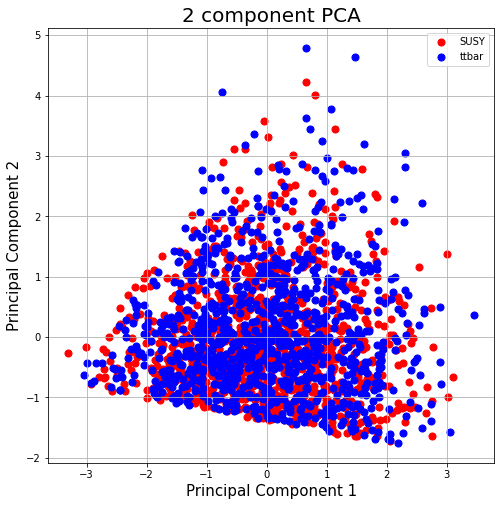

In [114]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['SUSY', 'ttbar']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [115]:
pca.explained_variance_

array([1.36226559, 0.99084356])

In [64]:
from sklearn.svm import SVC
# Support vector machine with 
# Radial basis function

# selected_columns = ['lepton_eta', 'sublepton_eta','llbar_deta']
# features are standardized
# Only over 10k features

svclassifier = SVC(kernel='rbf')
svclassifier.fit(data, label)

SVC()

In [65]:
y_pred = svclassifier.predict(test_data)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label,y_pred))
print(classification_report(test_label,y_pred))

[[7399 2601]
 [1025 8975]]
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80     10000
         1.0       0.78      0.90      0.83     10000

    accuracy                           0.82     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.82      0.82     20000



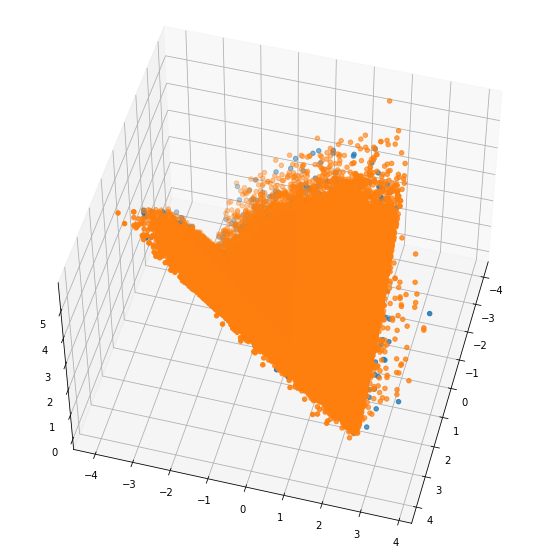

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sig_df.loc[:100,'lepton_eta'], sig_df.loc[:100,'sublepton_eta'], sig_df.loc[:100,'llbar_deta'])
ax.scatter(tt_df.loc[:100,'lepton_eta'] , tt_df.loc[:100,'sublepton_eta'] , tt_df.loc[:100,'llbar_deta'])
ax.view_init(azim=15, elev=50)

In [30]:
sig_df_test

,lepton_eta,sublepton_eta,llbar_deta
86303,-0.620736,-0.147429,-0.676758
86293,-0.224811,-0.886610,-0.235286
65060,0.792482,0.305052,-0.600018
115555,0.245280,0.842467,-0.405836
3605,-0.247284,-0.111799,-1.190319
...,...,...,...
89481,0.233343,1.234321,0.243793
63646,0.015979,0.372321,-0.812781
3600,0.916364,2.018467,0.462979
31938,0.266022,-1.048375,0.775792
